# 1- problem Definition and understanding
with growing demands and out-throat competitions in the market, a Superstore Giant
is seeking your knowledge in understanding what works best for them.
They would like to Understand which products, regions, categories and customer segments they
target or avoid


You can even take this a step further and try build a Regression model to predict Sales or Profit

# 1-1 Asking questions
- what are the top selling products in the superstore?
- what is the sales trend over time (monthly, yearly)?
- which category of products generates the highest revenue and profit?
- which region generates the most sales?
- what is the impact of discounts and promotions on sales?
- what is the average profit for each product category?
- which sub-category of products has the highest demand?

# 2 - Data understanding
- ROW ID => Unique ID for each row
- Order ID => Unique Order ID for each Customer
- Order Date => Order Date of the product
- Ship Date => Shipping Date of the Product
- Ship Mode => Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each customer
- Customer Name => Name of the Customer
- Segement => The segment where the Customer belongs
- Country => Country of residence of the Customer
- City => City of residence of the Customer
- State => State of residence of the customer
- Postal Code => Postal Code of every Customer
- Region => Region where the Customer belong
- Product ID => Unique of the product
- Category => Category of the product ordered
- Sub-Category => Sub-Category of the product ordered
- Product Name => Name of the Product
- Sales => Sales of the Product
- Quantity => Quantity of the Product
- Discount => Discount provided
- Profit => Profit/Loss incurred

# Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv("Superstore Sales Dataset.csv")

# Set the maximum number of columns to display
pd.options.display.max_columns = None

# Set the maximum number of rows to display
pd.options.display.max_rows = None

In [7]:
df.shape

(9800, 18)

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [15]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [17]:
df2 = df.dropna(subset=['Postal Code'])

In [19]:
df2.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

## Some statistical information
Understanding the distribution of the data, the mean , min , max, and other metrics provide a quick overview of the distribution of the data
Outlier detections: The min, 25%, 75%, and max values can help identify outliers in the data
Data normalization: The mean and std values can be used to normalize the data
Feature scaling: The min, max, and other values can be used to scale the features to a suitable range

In [22]:
df2.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


<Axes: >

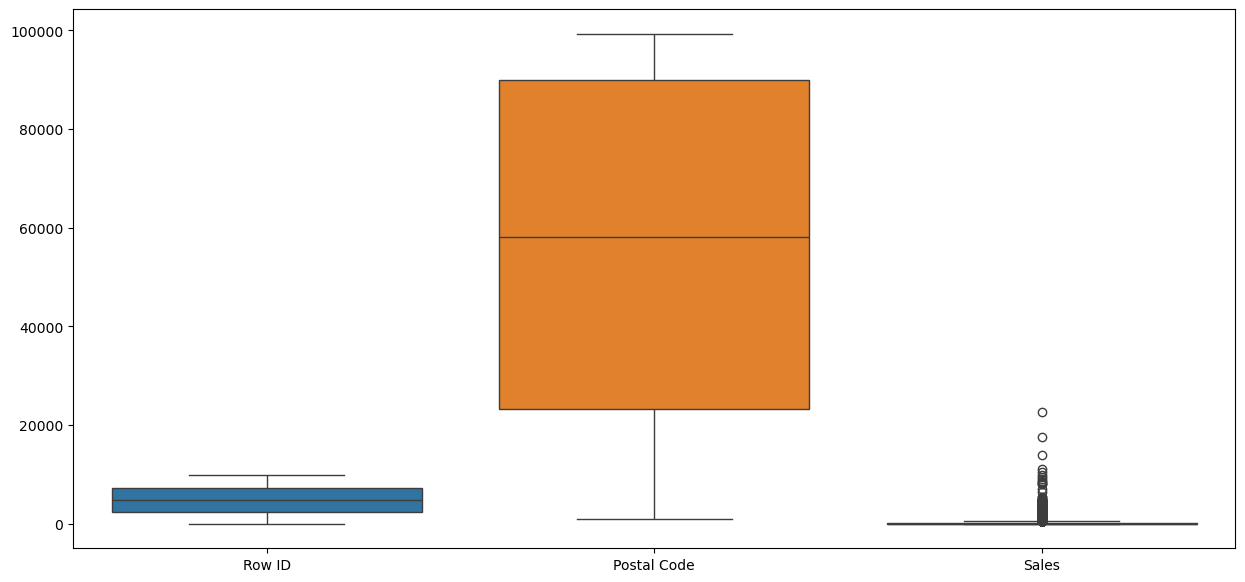

In [24]:
# We check the outliers of every feature using boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df2)

# Remove Outliers

In [27]:
# Removing the outliers

# Select only the numeric columns
numeric_df = df2.select_dtypes(include=[float, int])

for col in numeric_df:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    new_df2 = df2.loc[(df2[col] <= upper_limit) & (df2[col] >= lower_limit)]
print('before removing outliers: ', len(df2))
print('after removing outliers: ', len(new_df2))
print('outliers:', len(df2)-len(new_df2))

before removing outliers:  9789
after removing outliers:  8648
outliers: 1141


In [36]:
df2 = new_df2

In [38]:
# Check if there any duplicated value
df2.duplicated().sum()

0

In [40]:
df2.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# Let's take a look at categorical features

In [43]:
df_cat = df2[['Ship Mode', 'Customer ID' ,
             'Customer Name', 'Segment', 'Country', 'City',
             'State', 'Region', 'Product ID', 'Category',
             'Sub-Category', 'Product Name']]

In [45]:
# Shown the number of unique values in categorical data
for feature in df_cat.columns:
    print(feature, ":", df[feature].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 529
State : 49
Region : 4
Product ID : 1861
Category : 3
Sub-Category : 17
Product Name : 1849


In [47]:
df2['Order Date'].nunique()

1217

In [49]:
df2['Ship Date'].nunique()

1309

# Exploratory Data Analysis - EDA

In [52]:
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280


### What are the top selling products in the superstore?

In [55]:
# Group the data by product Name and sum up the dales by product
product_group = df2.groupby(["Product Name"]).sum()["Sales"]

In [57]:
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              379.214
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [59]:
# Sort the data by sales in descending order
top_selling_products = product_group.sort_values(ascending=False)


In [61]:
top_5_selling_products = pd.DataFrame(top_selling_products[:5])

In [63]:
top_5_selling_products

,Sales
Product Name,
KI Adjustable-Height Table,3950.781
"Global Wood Trimmed Manager's Task Chair, Khaki",3621.004
"Situations Contoured Folding Chairs, 4/Set",2959.866
"Global High-Back Leather Tilter, Burgundy",2841.069
Nortel Meridian M3904 Professional Digital phone,2802.618


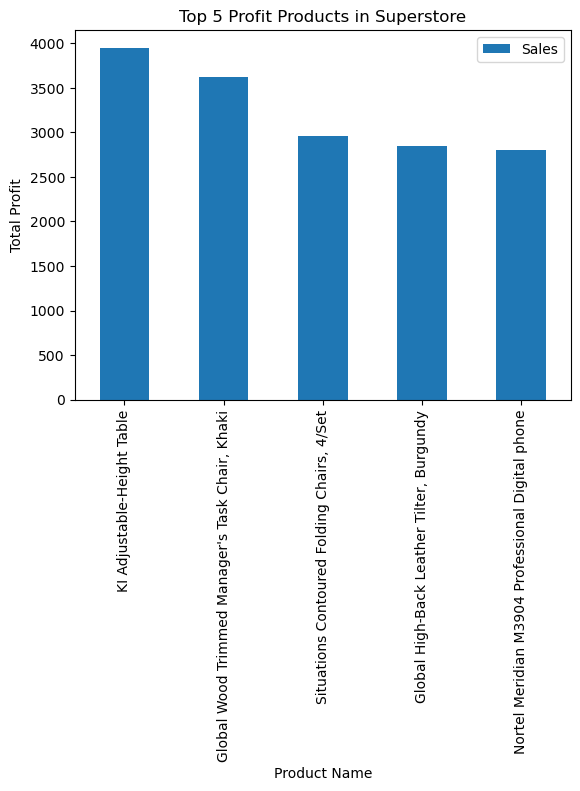

In [65]:
top_5_selling_products.plot(kind="bar")

# Add a title to the plot
plt.title("Top 5 Profit Products in Superstore")

# Add lables to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")

# Show the plot
plt.show()

## Now we can conclude some things
### top_5_selling_products:

- Canon imageCLASS 2200 Advanced Copier	61599.824
- 
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind	27453.38

- 
4- 
Cisco TelePresence System EX90 Videoconferencing Unit	22638.4

- 
8- 0
HON 5400 Series Task Chairs for Big and Tall	21870.

- 
5- 76
GBC DocuBind TL300 Electric Binding System	19823.479


In [68]:
df.Region.value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [131]:
print(df2["Product Name"].unique())  # Check for available products


['Bush Somerset Collection Bookcase'
 'Self-Adhesive Address Labels for Typewriters by Universal'
 "Eldon Fold 'N Roll Cart System" ... 'Cisco 8961 IP Phone Charcoal'
 'Hon 2111 Invitation Series Corner Table' 'Eureka Hand Vacuum, Bagless']


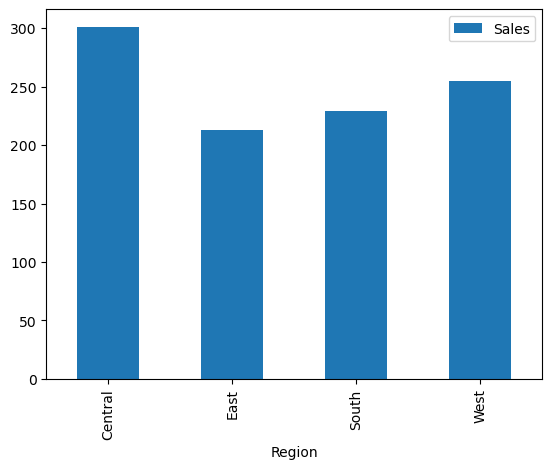

In [129]:
# Filter data for the specific product
product = df2[df2["Product Name"] == "KI Adjustable-Height Table"]

# Group the data by Region and calculate the mean for Sales
region_group = product.groupby(["Region"])[["Sales"]].mean()

# Plotting the results
region_group.plot(kind="bar")

plt.show()


In [ ]:
# Filter data for the product Fellows
product = df2[df2["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Group the data by region
region_group = product.groupby(["Region"])[["Sales"]].mean()

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# show the plot
plt.show()

# What is the sales trend over time (monthly, yearly)?


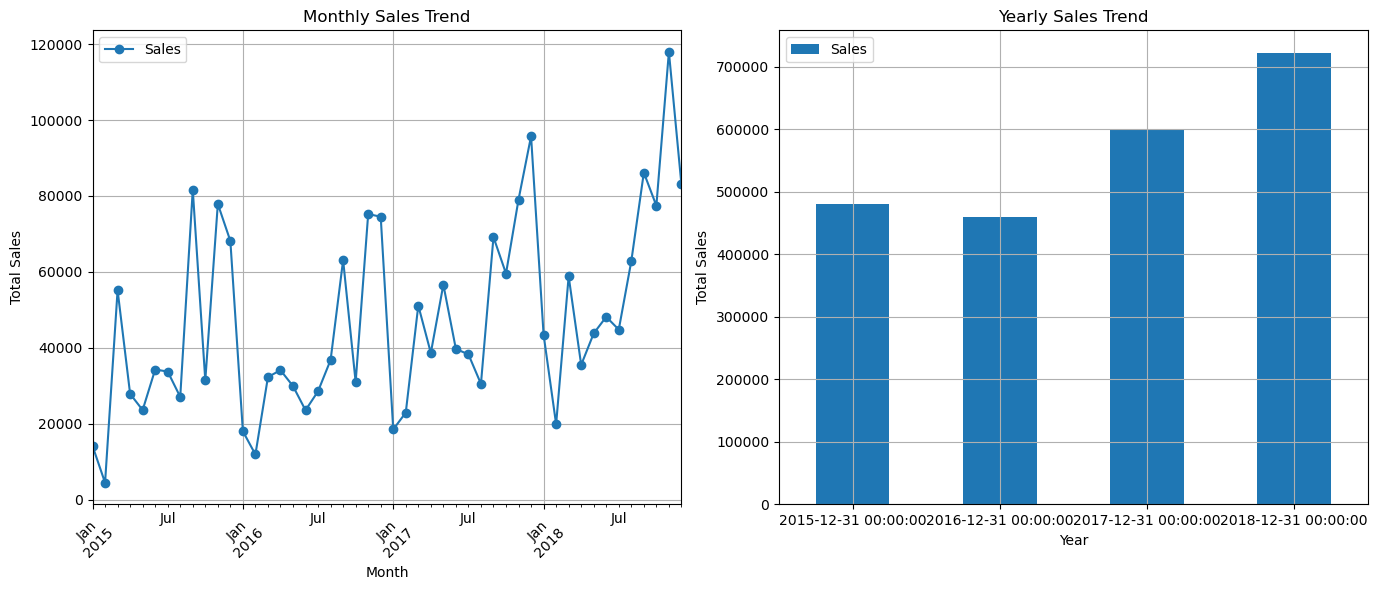

In [73]:

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Monthly sales trend
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))[['Sales']].sum()

# Yearly sales trend
yearly_sales = df.groupby(pd.Grouper(key='Order Date', freq='Y'))[['Sales']].sum()

# Plotting monthly sales
plt.figure(figsize=(14, 6))

# Monthly Sales Plot
plt.subplot(1, 2, 1)
monthly_sales.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()

# Yearly Sales Plot
plt.subplot(1, 2, 2)
yearly_sales.plot(kind='bar', ax=plt.gca())
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid()

plt.tight_layout()
plt.show()


# Which region & place generate the most sales?

In [76]:
df_places = df2[['Country', 'City', 'State', 'Region', 'Sales']]

In [78]:
df_places.head()

,Country,City,State,Region,Sales
0,United States,Henderson,Kentucky,South,261.960
2,United States,Los Angeles,California,West,14.620
4,United States,Fort Lauderdale,Florida,South,22.368
5,United States,Los Angeles,California,West,48.860
6,United States,Los Angeles,California,West,7.280


In [80]:
for place in df_places.columns:
    print(place, ':', df_places[place].nunique())

Country : 1
City : 525
State : 47
Region : 4
Sales : 4827


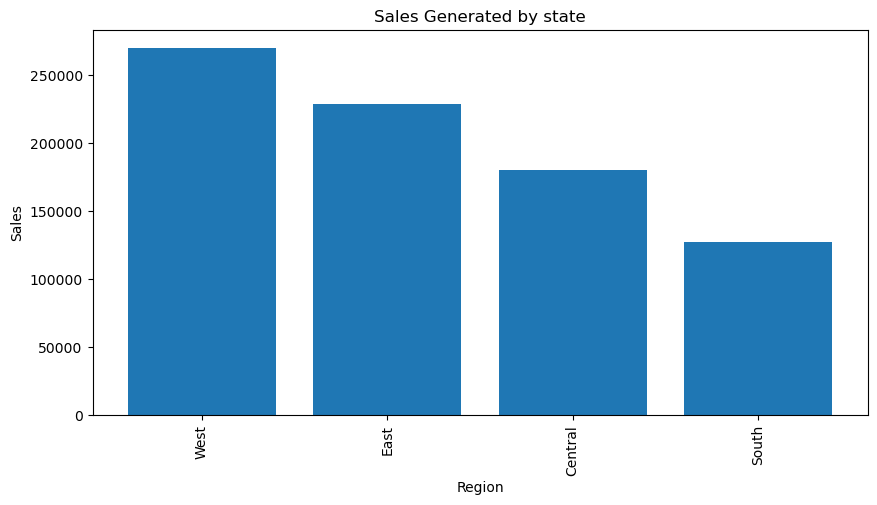

In [82]:
# Group the data by Region and city and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data["Region"], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by state")
plt.xticks(rotation=90)

plt.show()

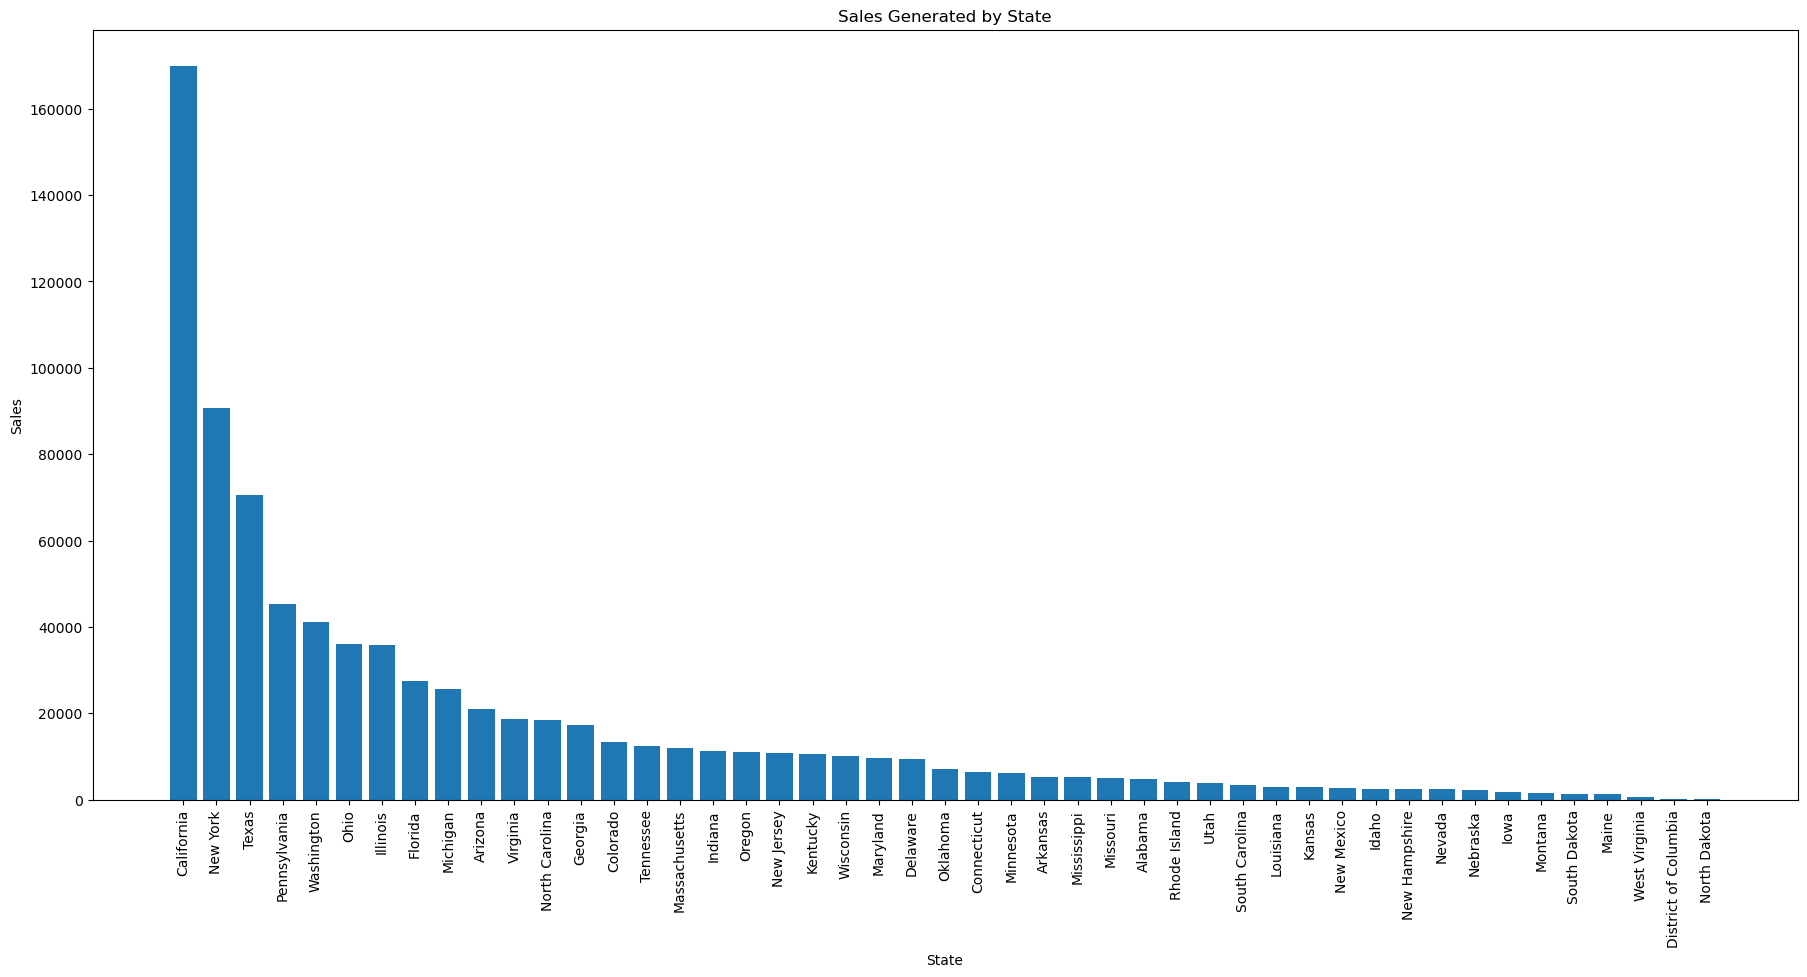

In [84]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

plt.figure(figsize=(22, 10))
plt.bar(grouped_data["State"], grouped_data["Sales"], align="center",)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

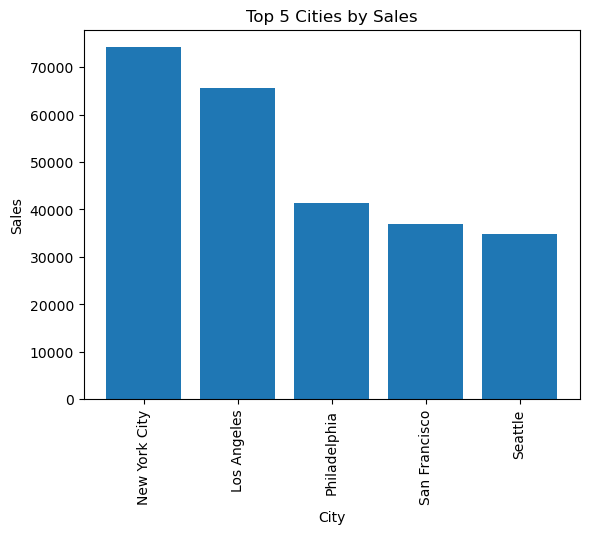

In [86]:
grouped_data = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Sales'], align='center')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=90)

plt.show()

# The best salles

In [89]:
# Group the data by products and category
avg_sales_by_category = df2.groupby('Category')['Sales'].mean()
avg_sales_by_category

Category
Furniture          150.105188
Office Supplies     60.195345
Technology         158.861803
Name: Sales, dtype: float64

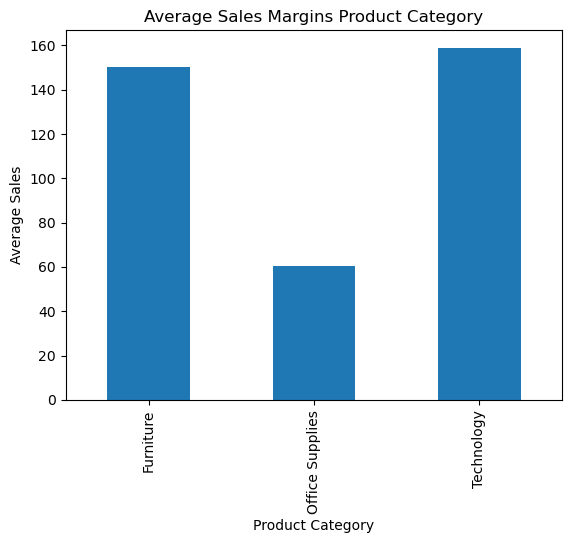

In [91]:
# Visulize through a graph
avg_sales_by_category.plot(kind='bar')

plt.title("Average Sales Margins Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Sales")
plt.show()


<Axes: xlabel='Sub-Category'>

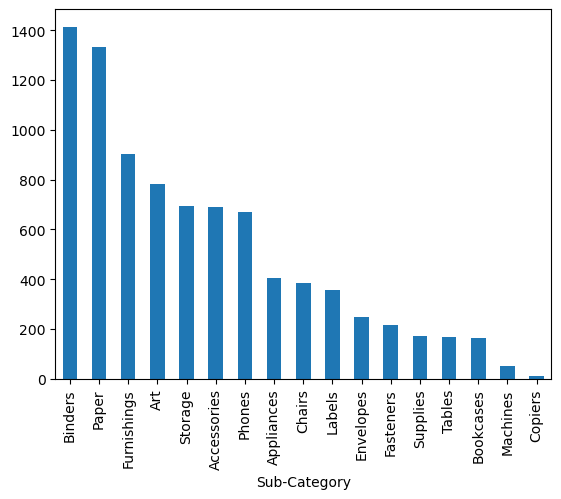

In [119]:
df2['Sub-Category'].value_counts().plot(kind="bar")

### Highes sold sub category is Binders and lowes sold sub category is Copiers

# Customers

In [94]:
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280


In [96]:
df2.Segment.value_counts()

Segment
Consumer       4540
Corporate      2578
Home Office    1530
Name: count, dtype: int64

In [98]:
df2['Ship Mode'].value_counts()

Ship Mode
Standard Class    5179
Second Class      1671
First Class       1325
Same Day           473
Name: count, dtype: int64

In [100]:
pivot_table = df2.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')

In [102]:
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,63334.2220,23986.215,85847.6034,257898.8194
Corporate,35479.0785,10106.608,48945.0058,141073.0175
Home Office,22207.1064,9558.886,23909.0340,83508.2438


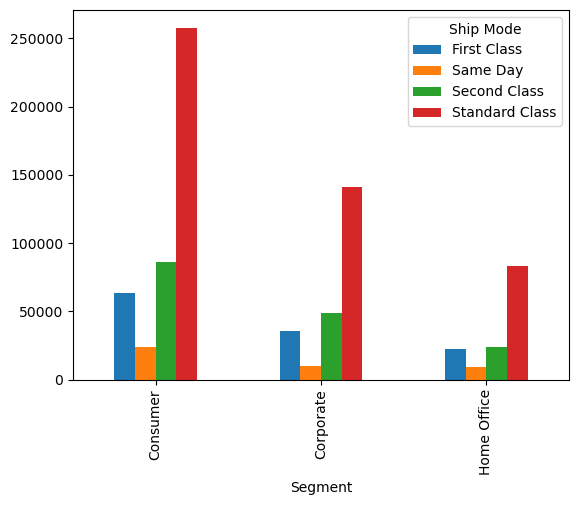

In [104]:
# plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False)
plt.show()

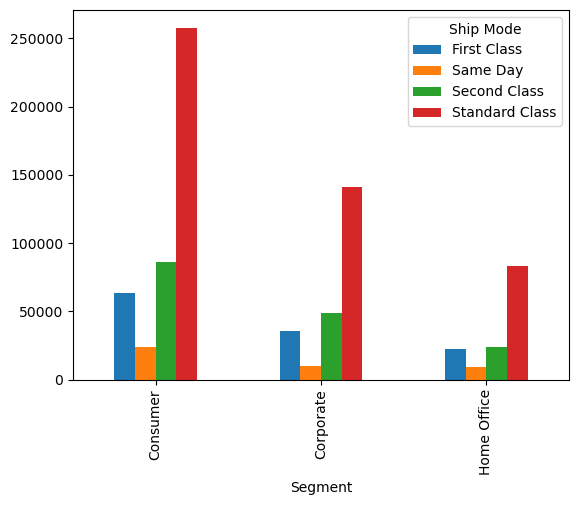

In [106]:
pivot_table = df2.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')
pivot_table.plot(kind='bar', stacked=False)
# Show the plot
plt.show()

### Most of the sales and profits come from (Consumers) who use (standard-class) shipping mode

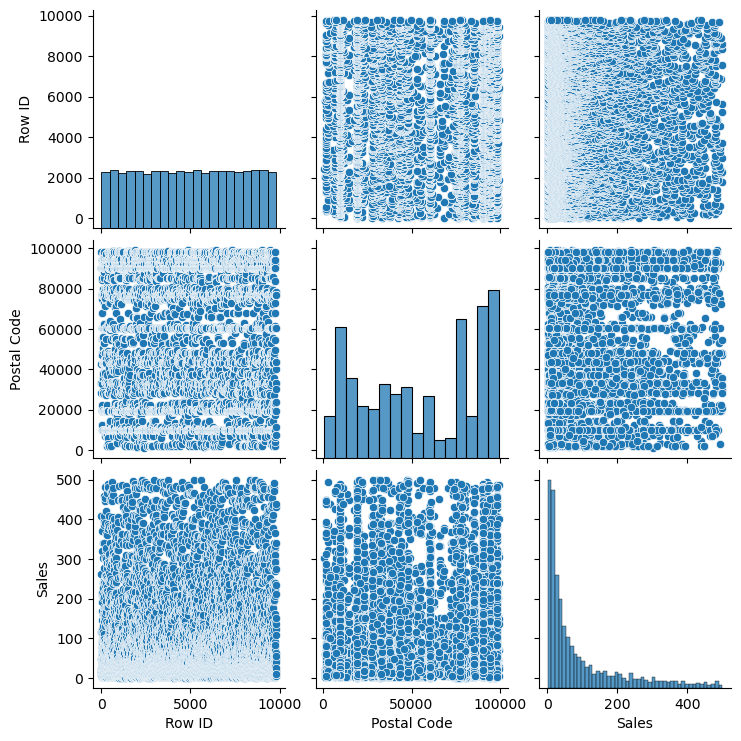

In [112]:
sns.pairplot(df2)

# Types of systems we can make on this dataset
- sales forcasting
- customer segmentation
- product recommendation
- Anomyl detection

## now we will build our model sales forecasting to predict sales 

# 1. Import Necessary Libraries

In [272]:
# Additional necessary imports for modeling and scaling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Correlation Analysis

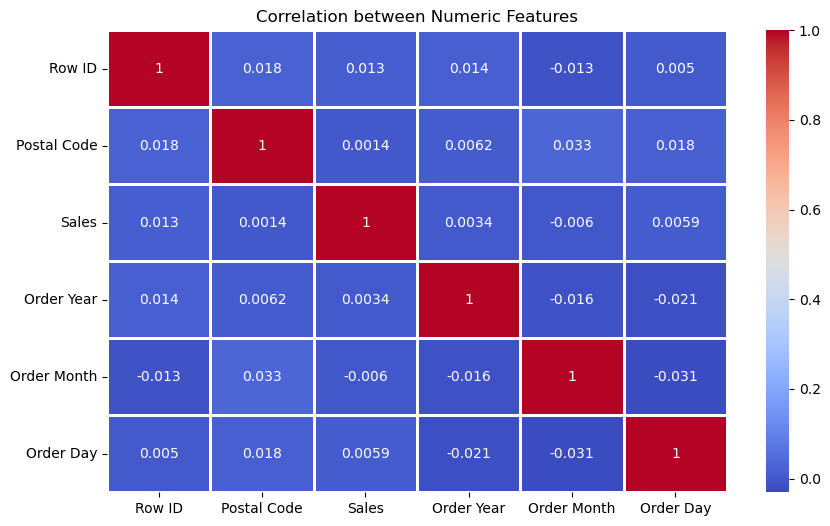

In [277]:
# Select only numeric columns for correlation
numeric_cols = df2.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation between Numeric Features")
plt.show()


# 3. Preprocessing Pipeline

In [290]:
# Select the relevant columns for regression
X = df2.drop(['Sales', 'Row ID', 'Order ID', 'Order Date', 'Ship Date'], axis=1)  # Dropping irrelevant columns for prediction
y = df2['Sales']  # Target variable

# Define the preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)


# 4. Model Selection and Training

In [293]:
# Define the regression models and pipeline
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Create a pipeline for the models
model_pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in models.items()}


# 5. Hyperparameter Tuning with Grid Search

In [296]:
# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model_pipelines['Random Forest Regressor'], param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Best score
print("Best R2 score: ", grid_search.best_score_)


Best parameters found:  {'model__max_depth': 30, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Best R2 score:  0.4524077683772182


# 6. Data Splitting and Model Evaluation

In [298]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
for name, pipeline in model_pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"{name}:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}\n")

# Perform cross-validation for the best model (Random Forest)
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Average cross-validation R2 score: {np.mean(cv_scores):.4f}")


Linear Regression:
R2 Score: 0.4877
Mean Squared Error: 7239.0905

Random Forest Regressor:
R2 Score: 0.4793
Mean Squared Error: 7358.3679

Cross-validation R2 scores: [0.44826174 0.46326587 0.46665133 0.42314121 0.46071869]
Average cross-validation R2 score: 0.4524


In [318]:
# Additional necessary imports
import joblib  # Correctly import joblib

# Save the best model from GridSearchCV
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
print("Model saved as best_model.pkl")


Model saved as best_model.pkl


# Test the model

In [321]:
# Load the model
loaded_model = joblib.load('best_model.pkl')

# Prepare your new data (make sure it matches the structure of the training data)
new_data = pd.DataFrame({
    'Ship Mode': ['Standard Class'],
    'Customer ID': ['C12345'],
    'Customer Name': ['John Doe'],
    'Segment': ['Consumer'],
    'Country': ['USA'],
    'City': ['New York'],
    'State': ['NY'],
    'Postal Code': ['10001'],
    'Region': ['Northeast'],
    'Product ID': ['P12345'],
    'Category': ['Furniture'],
    'Sub-Category': ['Chairs'],
    'Product Name': ['Office Chair'],
    'Order Year': [2024],
    'Order Month': [10],
    'Order Day': [3]
})

# Make predictions using the loaded model
predicted_sales = loaded_model.predict(new_data)

# Print the predictions
print(f"Predicted Sales: {predicted_sales}")


Predicted Sales: [246.02593915]
